In [10]:
!pip install --user PyROQ==0.1.14


  Using cached https://files.pythonhosted.org/packages/f4/bd/68dda2289eac43d2f4cfa54054e75e146012ff4cdde1598981a69ad2c07e/PyROQ-0.1.14-py3-none-any.whl
  Found existing installation: PyROQ 0.1.15
    Uninstalling PyROQ-0.1.15:
      Successfully uninstalled PyROQ-0.1.15


In [1]:
import numpy
import numpy as np
import scipy
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import lal
import lalsimulation
from lal.lal import PC_SI as LAL_PC_SI
import h5py
import warnings
import random
warnings.filterwarnings('ignore')
import matplotlib.pylab as pylab
plot_params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(plot_params)
from mpl_toolkits.mplot3d import axes3d
import PyROQ.pyroq as pyroq


# Setting up boundary conditions and tolerance requirements.

In [2]:
mc_low = 20
mc_high = 30 
q_low = 1
q_high = 4
s1sphere_low = [0, 0, 0]
s1sphere_high = [0.2, numpy.pi, 2.0*numpy.pi]
s2sphere_low = [0, 0, 0]
s2sphere_high = [0.2, numpy.pi, 2.0*numpy.pi]
ecc_low = 0.0
ecc_high = 0.2
lambda1_low = 0
lambda1_high = 1000
lambda2_low = 0
lambda2_high = 1000
iota_low = 0
iota_high = numpy.pi
phiref_low = 0
phiref_high = 2*numpy.pi
f_min = 20
f_max = 2048
deltaF = 0.25
distance = 10 * LAL_PC_SI * 1.0e6  # 10 Mpc is default 
waveFlags = lal.CreateDict()


#approximant = lalsimulation.IMRPhenomPv2_NRTidal
approximant = lalsimulation.IMRPhenomPv2
print("approximant number", approximant)
print("mass-min, mass-max: ", pyroq.massrange(mc_low, mc_high, q_low, q_high))

npts = 30 # Specify the number of points for each search for a new basis element
nts = 123 # Number of random test waveforms

nbases = 100 # Specify the number of linear basis elements
ndimlow = 60 # Starting number of basis elements used to check if tolerance is satisfied
ndimhigh = nbases+1
ndimstepsize = 20
tolerance = 1e-6 # Surrogage error threshold for linear basis elements

nbases_quad = 80 # Specify the number of quadratic basis elements
ndimlow_quad = 40 
ndimhigh_quad = nbases_quad+1
ndimstepsize_quad = 20
tolerance_quad = 1e-6 # Surrogage error threshold for quadratic basis elements

approximant number 72
mass-min, mass-max:  [12.011244339814313, 72.06746603888588]


In [3]:
freq = numpy.arange(f_min,f_max,deltaF)
nparams, params_low, params_high, params_start, hp1 = pyroq.initial_basis(mc_low, mc_high, q_low, q_high, s1sphere_low, s1sphere_high, \
                  s2sphere_low, s2sphere_high, ecc_low, ecc_high, lambda1_low, lambda1_high,\
                 lambda2_low, lambda2_high, iota_low, iota_high, phiref_low, phiref_high,  deltaF, f_min, f_max, distance, waveFlags, approximant)


# Searching for linear basis elements to build and save linear ROQ data.

In [4]:
known_bases_start = numpy.array([hp1/numpy.sqrt(numpy.vdot(hp1,hp1))])
basis_waveforms_start = numpy.array([hp1])
residual_modula_start = numpy.array([0.0])
known_bases, params, residual_modula = pyroq.bases_searching_results_unnormalized(npts, nparams, nbases, known_bases_start, basis_waveforms_start, params_start, residual_modula_start, params_low, params_high, deltaF, f_min, f_max, distance, waveFlags, approximant)
print(known_bases.shape, residual_modula)
known_bases_copy = known_bases
known_bases = known_bases_copy

Linear Iter:  0
Linear Iter:  1
Linear Iter:  2
Linear Iter:  3
Linear Iter:  4
Linear Iter:  5
Linear Iter:  6
Linear Iter:  7
Linear Iter:  8
Linear Iter:  9
Linear Iter:  10
Linear Iter:  11
Linear Iter:  12
Linear Iter:  13
Linear Iter:  14
Linear Iter:  15
Linear Iter:  16
Linear Iter:  17
Linear Iter:  18
Linear Iter:  19
Linear Iter:  20
Linear Iter:  21
Linear Iter:  22
Linear Iter:  23
Linear Iter:  24
Linear Iter:  25
Linear Iter:  26
Linear Iter:  27
Linear Iter:  28
Linear Iter:  29
Linear Iter:  30
Linear Iter:  31
Linear Iter:  32
Linear Iter:  33
Linear Iter:  34
Linear Iter:  35
Linear Iter:  36
Linear Iter:  37
Linear Iter:  38
Linear Iter:  39
Linear Iter:  40
Linear Iter:  41
Linear Iter:  42
Linear Iter:  43
Linear Iter:  44
Linear Iter:  45
Linear Iter:  46
Linear Iter:  47
Linear Iter:  48
Linear Iter:  49
Linear Iter:  50
Linear Iter:  51
Linear Iter:  52
Linear Iter:  53
Linear Iter:  54
Linear Iter:  55
Linear Iter:  56
Linear Iter:  57
Linear Iter:  58
Linear 

In [5]:
pyroq.roqs(tolerance, freq, ndimlow, ndimhigh, ndimstepsize, known_bases, nts, nparams, params_low, params_high, deltaF, f_min, f_max, distance, waveFlags, approximant)
b1 = numpy.load('./B_linear.npy')
f1 = numpy.load('./fnodes_linear.npy')
#print(b1.shape, f1.shape)
b_linear = numpy.transpose(numpy.load('./B_linear.npy'))
ndim = b_linear.shape[1]
print("Number of basis elements: ", ndim)

60 basis elements gave 0 bad points of surrogate error >  1e-06
Number of linear basis elements is  60 and the linear ROQ data save in B_linear.npy
Number of basis elements:  60


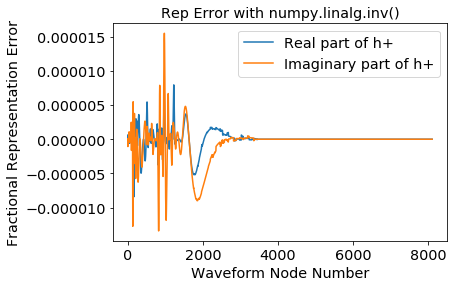

In [6]:
test_mc = 20
test_q = 4
test_s1 = [0.,0.2,-0.]
test_s2 = [0.,0.15,-0.1]
test_ecc = 0
test_lambda1 = 0
test_lambda2 = 0
test_iota = 1.9
test_phiref = 0.6

ndim, inverse_V, emp_nodes = pyroq.empnodes(ndim, known_bases_copy)
pyroq.testrep(b_linear, emp_nodes, test_mc, test_q, test_s1, test_s2, test_ecc, test_lambda1, test_lambda2, test_iota, test_phiref, deltaF, f_min, f_max, distance, waveFlags, approximant)
 

# Searching for quadratic basis elements and build quadratic ROQ data

In [7]:
hp1_quad = (numpy.absolute(hp1))**2
#known_bases_start = numpy.array([hp1/numpy.sqrt(numpy.vdot(hp1,hp1))])
known_quad_bases_start = numpy.array([hp1_quad/numpy.sqrt(numpy.vdot(hp1_quad,hp1_quad))])
basis_waveforms_quad_start = numpy.array([hp1_quad])
residual_modula_start = numpy.array([0.0])
known_quad_bases,params_quad,residual_modula_quad = pyroq.bases_searching_quadratic_results_unnormalized(npts, nparams, nbases_quad, known_quad_bases_start, basis_waveforms_quad_start, params_start, residual_modula_start, params_low, params_high, deltaF, f_min, f_max, distance, waveFlags, approximant)
known_quad_bases_copy = known_quad_bases


Quadratic Iter:  0
Quadratic Iter:  1
Quadratic Iter:  2
Quadratic Iter:  3
Quadratic Iter:  4
Quadratic Iter:  5
Quadratic Iter:  6
Quadratic Iter:  7
Quadratic Iter:  8
Quadratic Iter:  9
Quadratic Iter:  10
Quadratic Iter:  11
Quadratic Iter:  12
Quadratic Iter:  13
Quadratic Iter:  14
Quadratic Iter:  15
Quadratic Iter:  16
Quadratic Iter:  17
Quadratic Iter:  18
Quadratic Iter:  19
Quadratic Iter:  20
Quadratic Iter:  21
Quadratic Iter:  22
Quadratic Iter:  23
Quadratic Iter:  24
Quadratic Iter:  25
Quadratic Iter:  26
Quadratic Iter:  27
Quadratic Iter:  28
Quadratic Iter:  29
Quadratic Iter:  30
Quadratic Iter:  31
Quadratic Iter:  32
Quadratic Iter:  33
Quadratic Iter:  34
Quadratic Iter:  35
Quadratic Iter:  36
Quadratic Iter:  37
Quadratic Iter:  38
Quadratic Iter:  39
Quadratic Iter:  40
Quadratic Iter:  41
Quadratic Iter:  42
Quadratic Iter:  43
Quadratic Iter:  44
Quadratic Iter:  45
Quadratic Iter:  46
Quadratic Iter:  47
Quadratic Iter:  48
Quadratic Iter:  49
Quadratic 

In [8]:
points = numpy.random.uniform(params_low, params_high, size=(npts,nparams))


In [9]:
known_quad_bases = known_quad_bases_copy
pyroq.roqs_quad(tolerance_quad, freq, ndimlow_quad, ndimhigh_quad, ndimstepsize_quad, known_quad_bases, deltaF, nts, nparams, params_low, params_high, f_min, f_max, distance, waveFlags, approximant)
b2 = numpy.load('./B_quadratic.npy')
f2 = numpy.load('./fnodes_quadratic.npy')
print(b2.shape, f2.shape)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
test_mc_quad =20
test_q_quad = 1
test_s1_quad = [0.0, 0.0, 0.0]
test_s2_quad = [0.0, 0.0, 0.0]
test_ecc_quad = 0
test_lambda1_quad = 0
test_lambda2_quad = 0
test_iota_quad = 1.9
test_phiref_quad = 0.6

b_quad = numpy.transpose(numpy.load('./B_quadratic.npy'))
ndim_quad = b_quad.shape[1]
print(ndim_quad)
ndim_quad, inverse_V_quad, emp_nodes_quad = pyroq.empnodes_quad(ndim_quad, known_quad_bases_copy)
pyroq.testrep_quad(b_quad, emp_nodes_quad, test_mc_quad, test_q_quad, test_s1_quad, test_s2_quad, test_ecc_quad, test_lambda1_quad, test_lambda2_quad, test_iota_quad, test_phiref_quad, f_min, f_max, distance, waveFlags, approximant)
